In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#file resource
ev_data_pd = "electric_vehicle_population_Data.csv"


In [2]:
#open and store file into pandas
ev_data = pd.read_csv(ev_data_pd)

ev_data.head()

,VIN (1-10),County,City,State,ZIP Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location
0,JA4J24A5XJ,King,KENT,WA,98032,2018,MITSUBISHI,OUTLANDER,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,22,34595,33.0,245053693,POINT (-122.26132099999998 47.390601)
1,JN1AZ0CP7B,King,COVINGTON,WA,98042,2011,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,73,32780,47.0,265513174,POINT (-122.11667400000002 47.363112)
2,1G1FW6S07H,Clark,CAMAS,WA,98607,2017,CHEVROLET,BOLT,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,37495,18.0,8930036,POINT (-122.40849800000001 45.620943)
3,1N4AZ0CP6D,King,SEATTLE,WA,98117,2013,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,75,28800,36.0,182911767,POINT (-122.379354 47.687571)
4,JN1AZ0CP1B,Clark,CAMAS,WA,98607,2011,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,73,32780,18.0,247761594,POINT (-122.40849800000001 45.620943)


In [3]:
# Find the counts of hybrids vs. Battery electric
ev_data.rename(columns= {'VIN (1-10)': 'VIN', 'ZIP Code': 'ZIP', 
                         'Model Year': 'ModelYear', 'Electric Vehicle Type': 'Vehicle_Type', 
                         'Clean Alternative Fuel Vehicle (CAFV) Eligibility': 'CAFV_Eligibility',
                         'Electric Range': 'Electric_Range', 'Base MSRP': 'MSRP', 
                         'Legislative District': 'District', 'DOL Vehicle ID': 'Vehicle_ID', 'Vehicle Location': 'Location'}, inplace=True)
ev_data.head()

,VIN,County,City,State,ZIP,ModelYear,Make,Model,Vehicle_Type,CAFV_Eligibility,Electric_Range,MSRP,District,Vehicle_ID,Location
0,JA4J24A5XJ,King,KENT,WA,98032,2018,MITSUBISHI,OUTLANDER,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,22,34595,33.0,245053693,POINT (-122.26132099999998 47.390601)
1,JN1AZ0CP7B,King,COVINGTON,WA,98042,2011,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,73,32780,47.0,265513174,POINT (-122.11667400000002 47.363112)
2,1G1FW6S07H,Clark,CAMAS,WA,98607,2017,CHEVROLET,BOLT,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,37495,18.0,8930036,POINT (-122.40849800000001 45.620943)
3,1N4AZ0CP6D,King,SEATTLE,WA,98117,2013,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,75,28800,36.0,182911767,POINT (-122.379354 47.687571)
4,JN1AZ0CP1B,Clark,CAMAS,WA,98607,2011,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,73,32780,18.0,247761594,POINT (-122.40849800000001 45.620943)


In [4]:
Hybrid_count = ev_data.groupby('Vehicle_Type')['Vehicle_ID'].count()
Hybrid_count


Vehicle_Type
Battery Electric Vehicle (BEV)            42861
Plug-in Hybrid Electric Vehicle (PHEV)    18067
Name: Vehicle_ID, dtype: int64

Text(0, 0.5, 'Count of Vehicles')

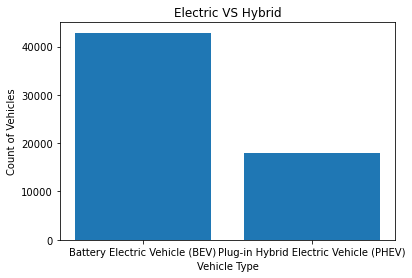

In [5]:

count_list = []
count_list.append (Hybrid_count[0])
count_list.append (Hybrid_count[1])
type_list = ["Battery Electric Vehicle (BEV)", "Plug-in Hybrid Electric Vehicle (PHEV)"]
plt.bar (type_list, count_list)
plt.title ("Electric VS Hybrid")
plt.xlabel ("Vehicle Type")
plt.ylabel ("Count of Vehicles")


In [6]:
#Most popular 
ev_data ["Make"].value_counts()


TESLA                   23434
NISSAN                  11065
CHEVROLET                8048
FORD                     3631
TOYOTA                   2756
BMW                      2593
KIA                      2204
AUDI                      982
VOLKSWAGEN                947
HYUNDAI                   857
CHRYSLER                  740
FIAT                      732
HONDA                     636
VOLVO                     542
MITSUBISHI                438
PORSCHE                   305
SMART                     241
MERCEDES-BENZ             235
MINI                      168
JAGUAR                    165
CADILLAC                   92
SUBARU                     42
LAND ROVER                 28
FISKER                     17
LINCOLN                    14
AZURE DYNAMICS              9
TH!NK                       3
WHEEGO ELECTRIC CARS        2
BENTLEY                     1
DODGE                       1
Name: Make, dtype: int64

In [7]:
ev_data ["Model"].value_counts()

MODEL 3                                13060
LEAF                                   11065
MODEL S                                 5858
VOLT                                    4729
MODEL X                                 2907
                                       ...  
FUSION SPECIAL SERVICE VEHICLE PHEV        1
918 SPYDER                                 1
BENTAYGA HYBRID                            1
PRIUS PLUG-IN HYBRID                       1
I8                                         1
Name: Model, Length: 101, dtype: int64

In [8]:
df = ev_data["Make"].value_counts().rename_axis("Make").reset_index(name= "counts")


df.head()


,Make,counts
0,TESLA,23434
1,NISSAN,11065
2,CHEVROLET,8048
3,FORD,3631
4,TOYOTA,2756


Text(0, 0.5, 'counts')

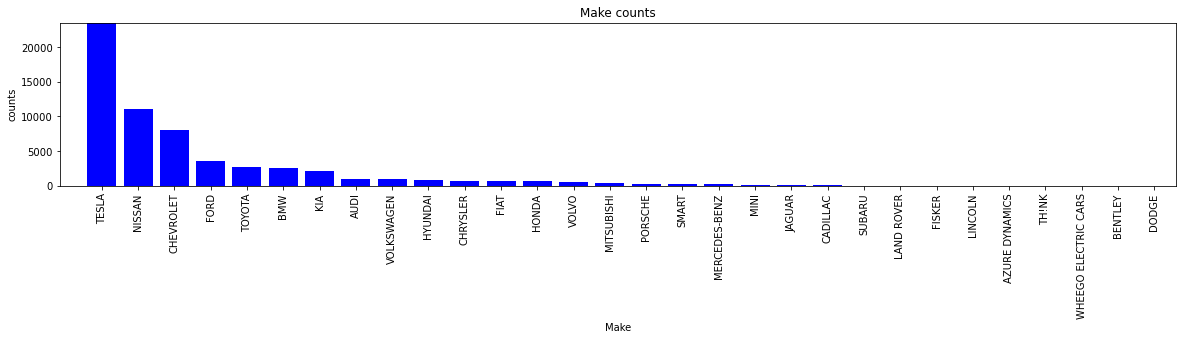

In [13]:
#model_count = ev_data ["Make"].value_counts()
#print (make_count)
#print (make_count[0])
#plt.bar(df["Make"], df["counts"])

x_axis = np.arange(len(df))
tick_locations = [value+0.4 for value in x_axis]

plt.figure(figsize=(20,3))
plt.bar(df["Make"], df["counts"], color='b', alpha= 1, align="edge")
plt.xticks ( tick_locations, df["Make"], rotation="vertical")

plt.xlim(-0.75, len(x_axis))
plt.ylim(0, max(df["counts"])+75)

plt.title("Make counts")
plt.xlabel("Make")
plt.ylabel("counts")
